In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('dar.csv')
data.head()

,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.4,0.083,45.0,0.9932,4.02,0.63,9.6,1
1,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,0
2,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,0
3,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,0
4,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,1


In [3]:
x = np.array(data.iloc[:,:-1])
y = np.array(data['quality'])
print(x)
y

[[ 2.4    0.083 45.    ...  4.02   0.63   9.6  ]
 [ 1.9    0.076 34.    ...  3.51   0.56   9.4  ]
 [ 2.6    0.098 67.    ...  3.2    0.68   9.8  ]
 ...
 [ 2.3    0.076 40.    ...  3.42   0.75  11.   ]
 [ 2.     0.075 44.    ...  3.57   0.71  10.2  ]
 [ 3.6    0.067 42.    ...  3.39   0.66  11.   ]]


array([1, 0, 0, ..., 1, 0, 1])

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size = 0.2)
print(x_train.shape)
x_test.shape

(1280, 7)


(320, 7)

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8


In [6]:
from sklearn import tree
import matplotlib.pyplot as plt

In [7]:
individual_tree = model.estimators_[0]

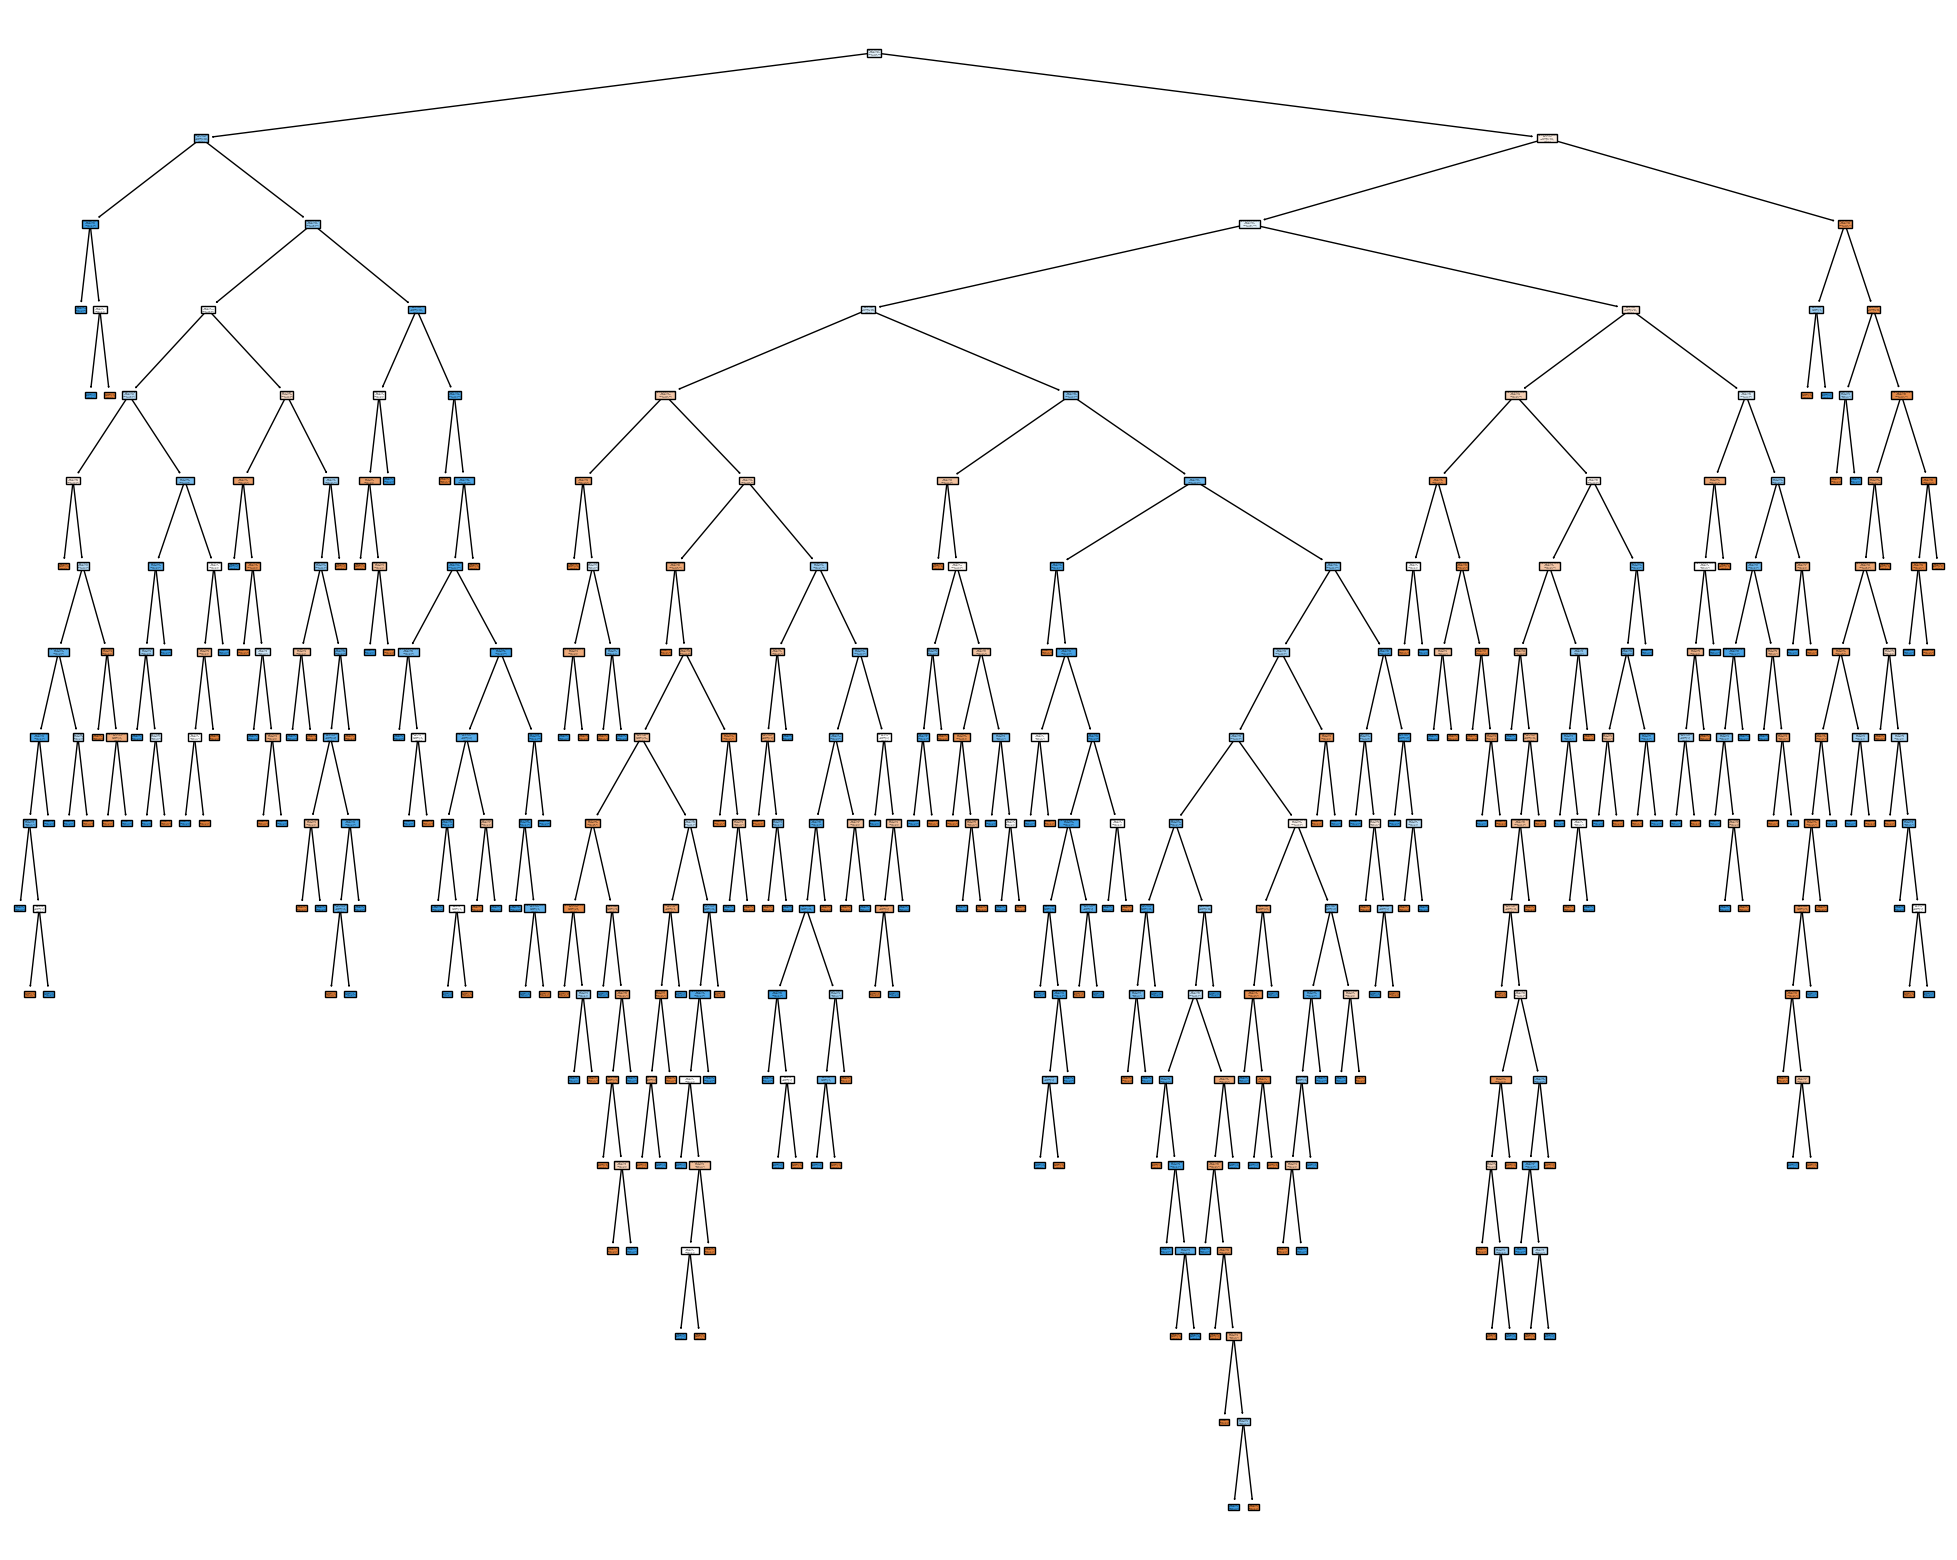

In [8]:
plt.figure(figsize=(25, 20))
tree.plot_tree(individual_tree, feature_names=data.columns[:-1], class_names=data.columns[-1], filled=True)
plt.show()